<a href="https://colab.research.google.com/github/gendo102/data_viz_projects/blob/main/Project%3A%20Recreating%20Gapminder's%20Data%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

**Project: Recreating Gapminder's Data Visualizations**
---

In this project, I set out to recreate some of the captivating charts showcased on Gapminder's website. Gapminder is renowned for its insightful data visualizations, and I was inspired to replicate a few of these visualizations to gain a deeper understanding of global trends.

**Recreating Gapminder's Charts**

Drawing from Gapminder's wealth of data, I've selected several charts to recreate, aiming to capture the essence of their powerful visual storytelling. By meticulously analyzing and visualizing the data, I aim to shed light on various global trends and disparities.

**Chart Selection**

I've chosen a diverse range of charts that exemplify Gapminder's ability to convey complex information in a visually compelling manner. From demographic shifts to economic indicators, each chart offers a unique perspective on our world.

**The Journey Ahead**

Join me on this exploration as we delve into the data, recreate Gapminder's iconic charts, and uncover insights into the evolving landscape of our global society.

[Explore Gapminder](https://www.gapminder.org)



# Chart #1
# Income, Life Expectancy, and Population by Region

For my first chart recreation project, I've chosen to replicate the visually striking visualization below from Gapminder. This chart offers a nuanced depiction of global trends, showcasing the relationship between income per person, life expectancy, and population size across different regions.

**Chart Details:**

X-axis: Income per person

Y-axis: Life expectancy in years

Fill: Region

Bubble Size: Population size


**Insights and Objectives:**

By recreating this chart, I aim to:

Visualize the correlation between income levels and life expectancy.
Highlight regional disparities in both income and life expectancy.
Demonstrate the impact of population size on the visualization's dynamics.

**Methodology:**

1. Data Retrieval and Preprocessing:

  *     Load the dataset using Pandas.
  *     Ensure data consistency and handle any missing values.

2.   Creating the Scatterplot with Seaborn:
  *     Use Seaborn's 'scatterplot' function to generate the scatter plot.
  *     Customize the size of the bubbles based on population size and differentiate bubbles by region.

3.   Adding Labels and Legend with Matplotlib:
  *     Use Matplotlib's xlabel, xscale, ylabel, yticks, and legend functions to add axis labels, define y-axis ticks, and place the legend appropriately.

4.  Enhancing Aesthetics:
  *     Customize plot aesthetics using Matplotlib's parameters, such as text positioning, font sizes, and font colors, to improve visual appeal and clarity.

**Chart Analysis:**

Income and Life Expectancy:
  
  * Higher income tends to correlate with longer life expectancy, reflecting broader socioeconomic trends.

Regional Disparities:
  * Countries in regions such as Europe and North America generally exhibit higher incomes and longer life expectancies compared to those in regions like Sub-Saharan Africa and South Asia
  
Population Influence:

  * Population size varies across countries, but its impact on income and life expectancy differs widely, especially in densely populated regions like Asia.



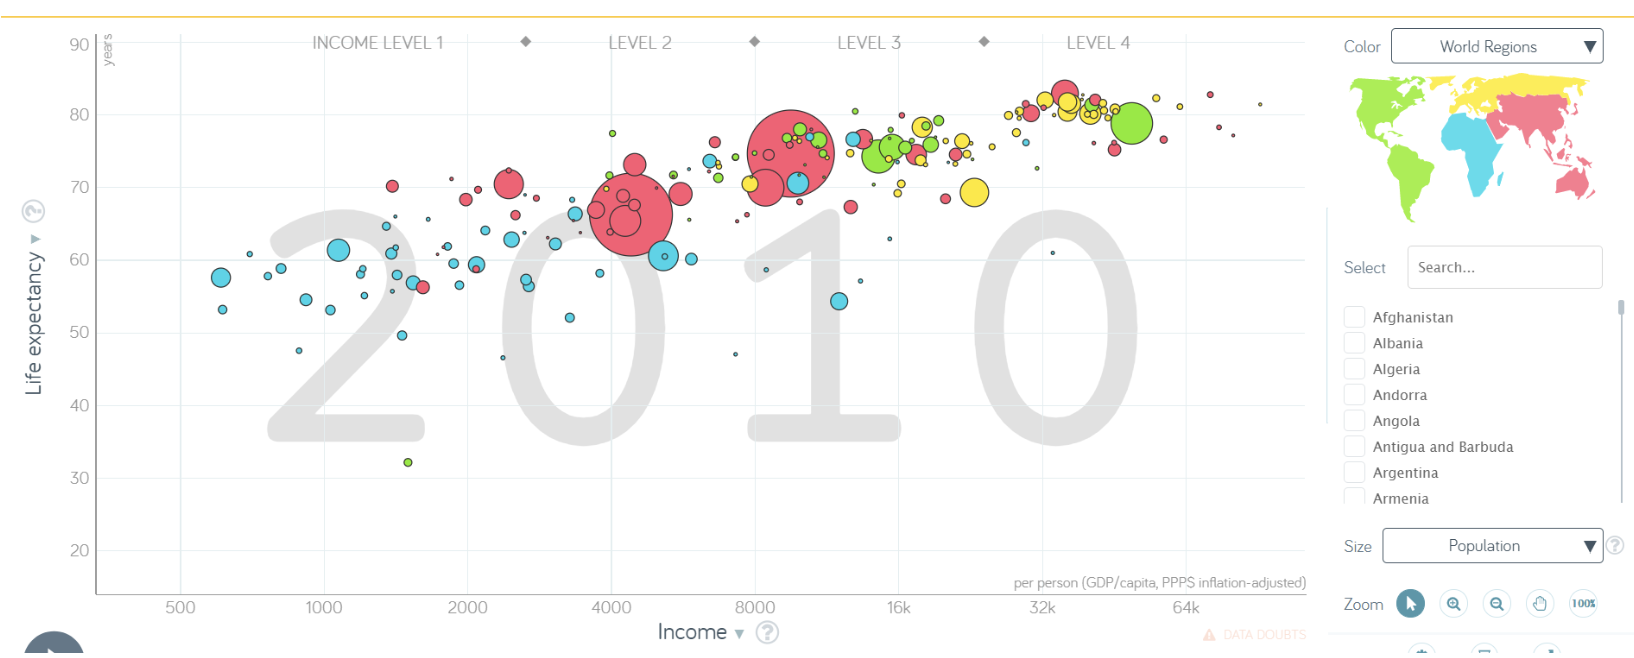


### Data Import & Cleaning

In [2]:
# read in csv file
data1 = pd.read_csv("q1data.csv")

In [3]:
data1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**Data Completeness:**

The DataFrame contains 197 entries across 9 columns. However, some columns have missing values (e.g., "income", "life_exp", "population", "four_regions", "six_regions", "eight_regions", "world_bank_region"), as indicated by the difference in non-null counts compared to the total entries.

**Column Types:**

The DataFrame comprises columns of various data types, including float64, int64, and object. This diversity in data types suggests a mix of numerical and categorical variables.

**Column Information:**

Each column provides specific information about the data:

*   "income": Income per person.
*   "life_exp": Life expectancy.
*   "population": Population size.
*   "year": Year of observation.
*   "country": Name of the country.
*   "four_regions", "six_regions", "eight_regions", "world_bank_region": Regional categorizations.


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             195 non-null    float64
 1   life_exp           195 non-null    float64
 2   population         195 non-null    float64
 3   year               197 non-null    int64  
 4   country            197 non-null    object 
 5   four_regions       193 non-null    object 
 6   six_regions        193 non-null    object 
 7   eight_regions      193 non-null    object 
 8   world_bank_region  193 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.0+ KB


In [5]:
#view rows with null values
null_mask = data1.isnull().any(axis=1)
null_rows = data1[null_mask]

print(null_rows)

      income  life_exp  population  year           country four_regions  \
56    7580.0      49.8   1060000.0  2010          Eswatini          NaN   
73       NaN       NaN       783.0  2010          Holy See          NaN   
75   53500.0      83.0         NaN  2010  Hong Kong, China         asia   
99       NaN       NaN     36000.0  2010     Liechtenstein          NaN   
129  13800.0      73.7   2070000.0  2010   North Macedonia          NaN   
172  44400.0      79.5         NaN  2010            Taiwan         asia   

           six_regions      eight_regions    world_bank_region  
56                 NaN                NaN                  NaN  
73                 NaN                NaN                  NaN  
75   east_asia_pacific  east_asia_pacific  East Asia & Pacific  
99                 NaN                NaN                  NaN  
129                NaN                NaN                  NaN  
172  east_asia_pacific  east_asia_pacific  East Asia & Pacific  


**Dropping Null Values:**

Given the presence of missing data in several columns, a decision was made to drop these null values from the DataFrame. After viewing the rows with null values, I determined missing data seems sporadic and limited to specific rows. This approach ensures the integrity of the analysis by removing incomplete observations that may skew results or lead to misinterpretation.

In [6]:
data1.dropna()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


### Visualization

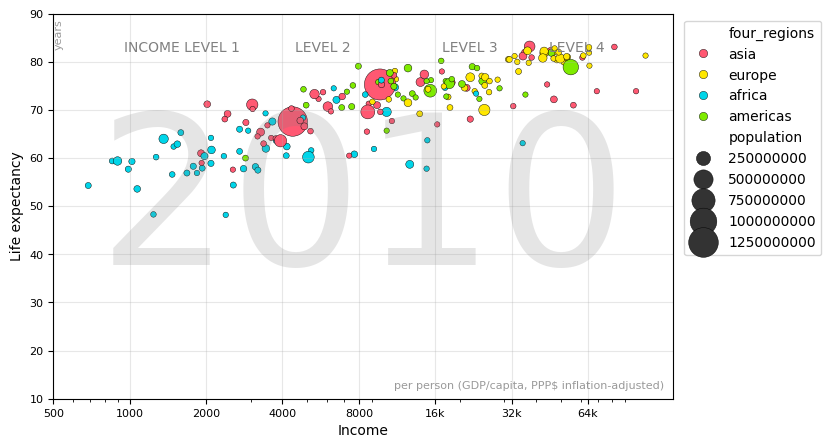

In [7]:
#set plot size
plt.figure(figsize=(8, 5))

#create seanborn scatterplot
sns.scatterplot(data=data1,
                x='income',
                y='life_exp',
                hue='four_regions',
                size='population',
                sizes=(15, 500),
                edgecolor='black',
                palette = {'africa' : '#00d5e9', 'asia' : '#ff5872', 'americas' : '#7feb00', 'europe' : '#ffe700'} )

#add labels
plt.xlabel('Income')
plt.ylabel('Life expectancy')

#add gray grid lines
plt.grid(alpha = 0.3)

#add scaling the x axis
plt.xscale('log')

#label x and y axis ticks
plt.xticks([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
           ['500', '1000', '2000', '4000', '8000', '16k', '32k', '64k'],
           size=8)
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90], size=8)

#add year to background
plt.text(0.5, 0.5, '2010', transform=plt.gca().transAxes,
         fontsize=150, color='gray', alpha=0.2,
         ha='center', va='center')

#add smaller text elements
plt.text(11000, 12, 'per person (GDP/capita, PPP$ inflation-adjusted)', fontsize=8, color='black', alpha=0.4)

plt.text(500, 83, 'years', fontsize=8, color='black', rotation=90, alpha=0.4)

plt.text(950, 82, 'INCOME LEVEL 1', fontsize=10, color='gray')

plt.text(4500, 82, 'LEVEL 2', fontsize=10, color='gray')

plt.text(17000, 82, 'LEVEL 3', fontsize=10, color='gray')

plt.text(45000, 82, 'LEVEL 4', fontsize=10, color='gray')

#add legend
plt.legend(bbox_to_anchor=(1.25, 1))

# Chart #2
# Exports, Imports, and Energy Use by Region

Continuing with our exploration, the second chart I recreate showcases the relationship between exports (% of GDP), imports (% GDP/capita), and energy use per person across various regions.

**Chart Details:**

X-axis:  Exports (% of GDP)

Y-axis: Imports (% GDP/capita)

Fill: Region

Bubble Size: Energy use


**Insights and Objectives:**

Building upon our previous analysis, I aim to:

Examine the interplay between trade dynamics (exports and imports) and energy consumption.
Explore how trade patterns relate to energy use on a regional level.

**Methodology:**

The methodology for recreating this chart largely mirrors that of the previous chart, involving data retrieval, preprocessing, scatterplot creation using Seaborn, and customization of labels and aesthetics with Matplotlib.

**Chart Analysis:**

Trade Dynamics and Energy Use:

  * Countries with higher exports as a percentage of GDP generally exhibit higher levels of imports as a percentage of GDP, indicating a pattern of balanced trade. This suggests that countries with strong export sectors also tend to have higher demand for imported goods and services.

  * Some regions, particularly those with high levels of industrialization and manufacturing such as North America and Europe, show larger bubbles, indicating higher energy consumption per capita. In contrast, regions with lower levels of economic development like Africa tend to have smaller bubbles, reflecting lower energy consumption per person.
  
Environmental Implications:

  * Regions with higher levels of trade and energy use may face greater challenges related to pollution, resource depletion, and climate change. Addressing these environmental concerns requires coordinated efforts at the national and international levels to promote clean energy technologies, resource efficiency, and sustainable consumption patterns.




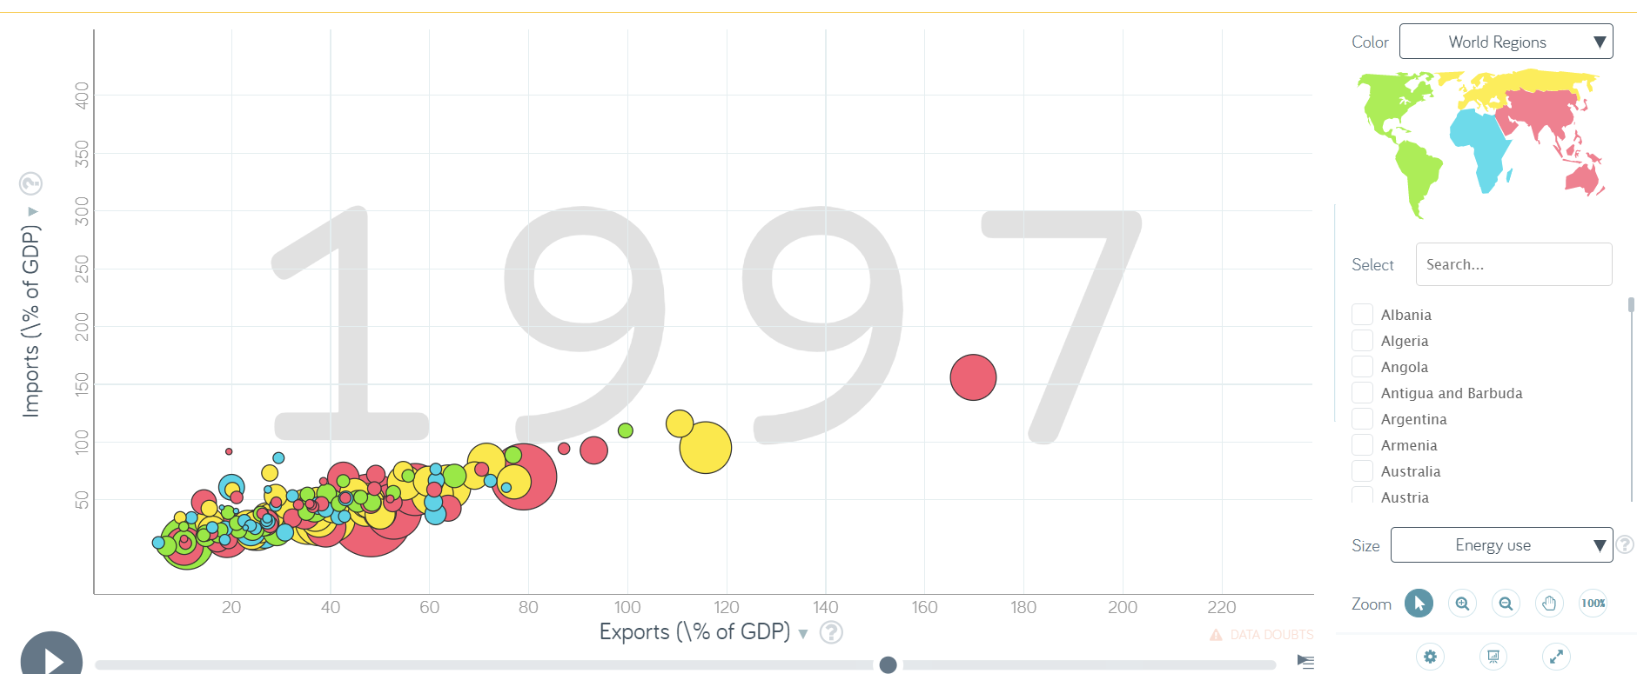

### Data Import & Cleaning

In [8]:
# read in csv file
data2 = pd.read_csv("q2data.csv")

In [9]:
data2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**Data Completeness:**

The DataFrame contains 206 entries across 9 columns. Again, there are some columns have missing values as indicated by the difference in non-null counts compared to the total entries.

**Column Types:**

The DataFrame also comprises columns of various data types, including float64, int64, and object.

**Column Information:**

Each column provides specific information about the data:

*   "imports": Imports as a percentage of GDP.
*   "exports": Exports as a percentage of GDP.
*   "energy": Energy-related data
*   "year": Year of observation.
*   "country": Name of the country.
*   "four_regions", "six_regions", "eight_regions", "world_bank_region": Regional categorizations.


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imports            171 non-null    float64
 1   exports            171 non-null    float64
 2   energy             137 non-null    object 
 3   year               206 non-null    int64  
 4   country            206 non-null    object 
 5   four_regions       182 non-null    object 
 6   six_regions        182 non-null    object 
 7   eight_regions      182 non-null    object 
 8   world_bank_region  182 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.6+ KB


In [11]:
#view rows with null values
null_mask = data2.isnull().any(axis=1)
null_rows = data2[null_mask]

print(null_rows)

     imports  exports energy  year                country four_regions  \
0        NaN      NaN    NaN  1997            Afghanistan         asia   
3        NaN      NaN    NaN  1997         American Samoa          NaN   
4        NaN      NaN    434  1997                 Angola       africa   
5       83.4   112.00    NaN  1997    Antigua and Barbuda     americas   
8       83.6    79.70    NaN  1997                  Aruba          NaN   
..       ...      ...    ...   ...                    ...          ...   
192     20.4     9.64    NaN  1997                 Uganda       africa   
194      NaN      NaN  11.2k  1997   United Arab Emirates         asia   
199     52.5    42.30    NaN  1997                Vanuatu         asia   
202      NaN      NaN    NaN  1997  Virgin Islands (U.S.)          NaN   
203      NaN      NaN    241  1997                  Yemen          NaN   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia  

**Dropping Null Values:**

For this chart, I again decided to drop the null values after evalauting the rows and missing values.

In [12]:
data2.dropna()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
200,22.7,20.9,2250,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [13]:
#converting energy values into usable numeric values
data2["energy"] = pd.to_numeric(data2["energy"].str.replace('k', '000'))

### Visualization

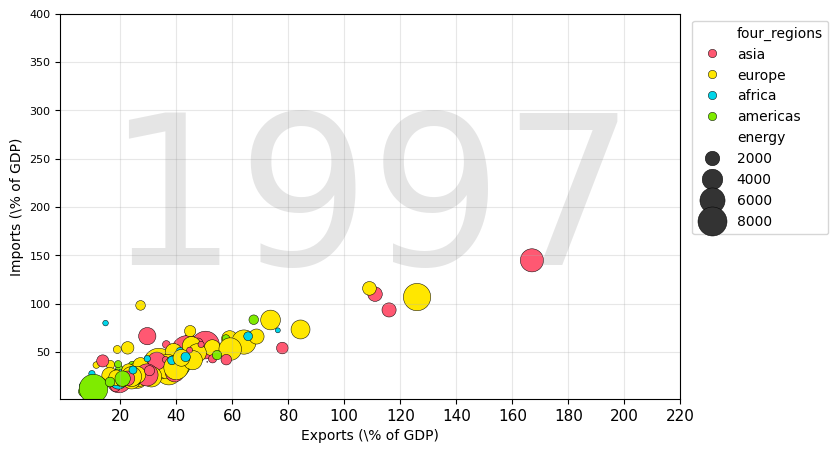

In [14]:
#set plot size
plt.figure(figsize=(8, 5))

#create seaborn scatterplot
sns.scatterplot(data = data2,
                x = "exports",
                y = "imports",
                hue = "four_regions",
                size='energy',
                sizes=(0, 500),
                edgecolor='black',
                palette = {'africa' : '#00d5e9', 'asia' : '#ff5872', 'americas' : '#7feb00', 'europe' : '#ffe700'} )

#add labels
plt.xlabel('Exports (\% of GDP)')
plt.ylabel('Imports (\% of GDP)')

#add gray grid lines
plt.grid(alpha = 0.3)

#label x and y axis ticks
plt.yticks([50, 100, 150, 200, 250, 300, 350, 400], size=8)
plt.xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], size=11)

#add year to background
plt.text(0.5, 0.5, '1997', transform=plt.gca().transAxes,
         fontsize=150, color='gray', alpha=0.2,
         ha='center', va='center')

#add legend
plt.legend(bbox_to_anchor=(1.25, 1))

1. The aesthetics for this visualization are individuals using the internet on the x axis, GDP/capita on the y axis, the fill is based on the region, the size of the bubbles is based on income.



# Chart #3
# Internet Usage, GDP/Capita, and Income by Region

For my last chart chart I am recreating a plot that shows relationship between individuals using the internet, GDP per capita, and income per person across various regions.

**Chart Details:**

X-axis: Individuals using the internet (% of population)

Y-axis: GDP per capita

Fill: Region

Bubble Size: Income per person


**Insights and Objectives:**

For my third chart, I aim to better understand the intricate relationship between internet usage, GDP per capita, and individual income across diverse regions.

**Methodology:**

For the third chart, my approach echoes that of previous analyses, encompassing data retrieval, preprocessing, and the creation of a scatterplot utilizing Seaborn. This methodology allows for the exploration of the interconnections between internet usage, economic prosperity, and individual income. Through meticulous customization of labels and aesthetics with Matplotlib, we aim to present our findings in a visually compelling and informative manner.

**Chart Analysis:**

Internet Usage, GDP/Capita, and Income:

  * Countries with higher levels of internet usage as a percentage of the population tend to exhibit higher GDP per capita, indicating a positive correlation between internet accessibility and economic prosperity.
  * The size of bubbles representing income per person varies across regions, with regions characterized by higher levels of economic development, such as North America and Europe, showing larger bubbles. This indicates higher income per person in these regions compared to less developed regions.





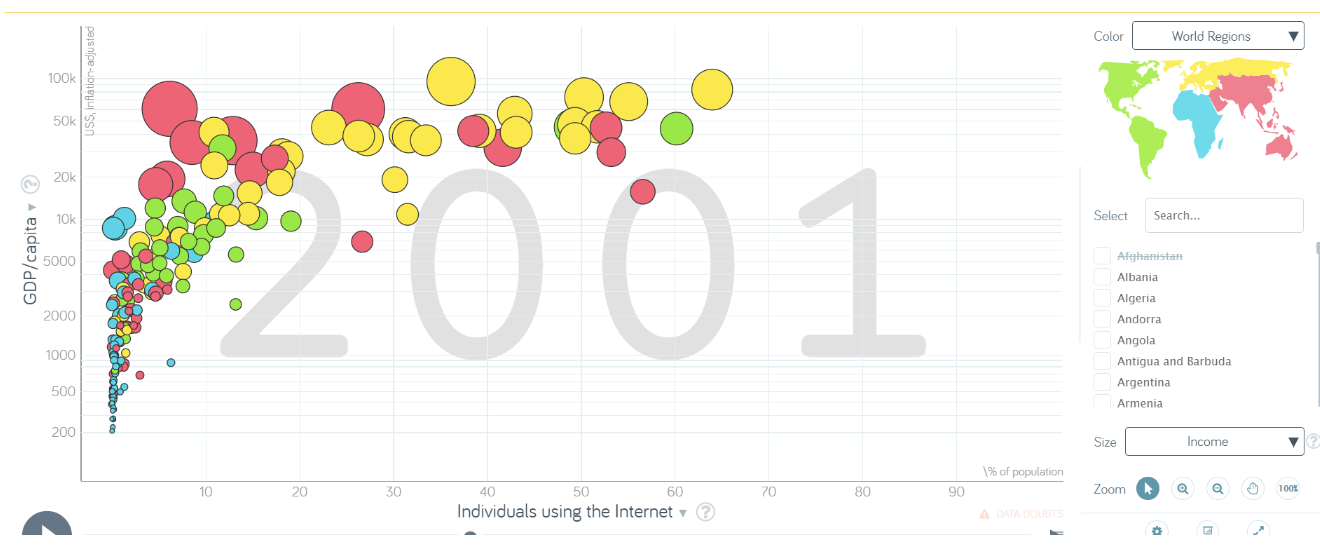

### Data Import & Cleaning

In [15]:
data3 = pd.read_csv("q3data.csv")

In [16]:
data3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


**Data Completeness:**

Within the DataFrame comprising 215 entries across 9 columns, there are noticeable instances of missing values.

**Column Types:**

The DataFrame demonstrates a diverse range of data types, encompassing float64, int64, and object classifications.

**Column Information:**

Each column provides specific information about the data:

*   "internet_users": Percentage of individuals using the internet.
*   "gdp": Gross Domestic Product (GDP) per capita.
*   "income": Individual income per person.
*   "year": Year of observation.
*   "country": Name of the country.
*   "four_regions", "six_regions", "eight_regions", "world_bank_region": Regional categorizations.

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   internet_users     200 non-null    float64
 1   gdp                199 non-null    float64
 2   income             195 non-null    float64
 3   year               215 non-null    int64  
 4   country            215 non-null    object 
 5   four_regions       193 non-null    object 
 6   six_regions        193 non-null    object 
 7   eight_regions      193 non-null    object 
 8   world_bank_region  193 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 15.2+ KB


In [18]:
#view rows with null values
null_mask = data3.isnull().any(axis=1)
null_rows = data3[null_mask]

print(null_rows)

     internet_users      gdp   income  year                   country  \
3               NaN  10500.0      NaN  2001            American Samoa   
9            18.800  25500.0      NaN  2001                     Aruba   
10              NaN  45800.0  39700.0  2001                 Australia   
21           52.000  99500.0      NaN  2001                   Bermuda   
27           18.900      NaN      NaN  2001    British Virgin Islands   
36              NaN      NaN      NaN  2001            Cayman Islands   
49              NaN      NaN      NaN  2001                   Curaçao   
53            0.487      NaN   2480.0  2001                  Djibouti   
62            1.820   3240.0   5810.0  2001                  Eswatini   
64           53.300      NaN      NaN  2001            Faeroe Islands   
68            8.200      NaN      NaN  2001          French Polynesia   
74           23.700      NaN      NaN  2001                 Gibraltar   
76           44.200  32100.0      NaN  2001        

In [19]:
data3.dropna()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
5,0.27000,2440.0,2900.0,2001,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
209,4.91000,10800.0,14800.0,2001,Venezuela,americas,america,america_south,Latin America & Caribbean
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


### Visualization

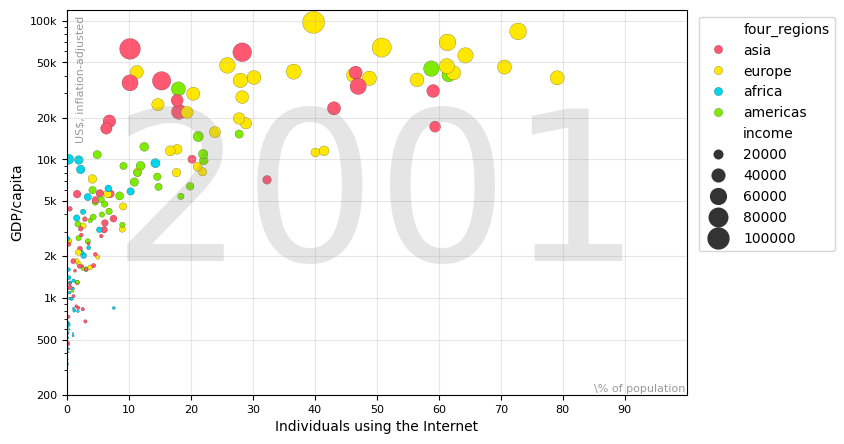

In [20]:
#set plot size
plt.figure(figsize=(8, 5))

#create seaborn scatterplot
sns.scatterplot(data=data3,
                x='internet_users',
                y='gdp',
                hue='four_regions',
                size='income',
                sizes=(0, 250),
                edgecolor='black',
                palette = {'africa' : '#00d5e9', 'asia' : '#ff5872', 'americas' : '#7feb00', 'europe' : '#ffe700'} )



#add labels
plt.xlabel('Individuals using the Internet')
plt.ylabel('GDP/capita')

#add gray grid lines
plt.grid(alpha = 0.3)

#add limits and scaling
plt.xlim(0, 100)
plt.ylim(200, 120000)
plt.xscale('linear')
plt.yscale('log')

#label x and y axis ticks
plt.xticks(range(0, 100, 10), fontsize=8)
plt.yticks([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
           ['200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k'], fontsize=8)


#add year to background
plt.text(0.5, 0.5, '2001', transform=plt.gca().transAxes,
         fontsize=150, color='gray', alpha=0.2,
         ha='center', va='center')


#add smaller text elements
plt.text(85, 210, '\% of population', fontsize=8, color='black', alpha=0.4)

plt.text(1.5, 13500, 'US$, inflation-adjusted', fontsize=8, color='black', rotation=90, alpha=0.4)


#add legend
plt.legend(bbox_to_anchor=(1.25, 1))